In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('C:\\Users\\march\\Downloads\mnist_test.csv')

In [21]:
data.head() # each line is an image composed of 784 pixels (28x28)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data = np.array(data) # numpy allows better manipulation of vectors and matrices than pandas
m, n = data.shape # m is the number of images and n our variables
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T # the first 1000 images are part of the test set (it is transposed)
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [23]:
Y_train

array([4, 2, 9, ..., 3, 7, 6], dtype=int64)

In [24]:
def init_params():                      # Initialise normalised parameters
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2

def ReLU(Z):                            # ReLU (rectified linear unit) activation function 
    return np.maximum(Z, 0)

def softmax(Z):                         # The softmax function or normalized exponential function.
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1                 # Z1 is the linear combination of W1*X+b1
    A1 = ReLU(Z1)                       # A1 is the activation parameter
    Z2 = W2.dot(A1) + b2                # Z2 is the linear combination of W2*A1+b2
    A2 = softmax(Z2)                    # A2 is a probability/ parameters vector
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):                      # calculates the derivative of the activation function, but it is a linear function if x>0 therefore always equal to 1
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # creates m arrays of 10 0, i.e. the value of the maximum digit (9) +1  
    one_hot_Y[np.arange(Y.size), Y] = 1         # all become 1
    one_hot_Y = one_hot_Y.T                     # we obtain the transposed
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y): # define functions to update parameters
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y                        
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): 
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [25]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [26]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 6 6 ... 6 6 6] [4 2 9 ... 3 7 6]
0.10111111111111111
Iteration:  10
[0 2 6 ... 3 6 6] [4 2 9 ... 3 7 6]
0.31933333333333336
Iteration:  20
[9 2 9 ... 3 6 6] [4 2 9 ... 3 7 6]
0.49633333333333335
Iteration:  30
[9 2 9 ... 3 7 6] [4 2 9 ... 3 7 6]
0.5706666666666667
Iteration:  40
[4 2 9 ... 3 5 6] [4 2 9 ... 3 7 6]
0.6418888888888888
Iteration:  50
[4 2 9 ... 3 5 6] [4 2 9 ... 3 7 6]
0.6996666666666667
Iteration:  60
[4 2 9 ... 3 5 6] [4 2 9 ... 3 7 6]
0.7414444444444445
Iteration:  70
[4 2 9 ... 3 5 6] [4 2 9 ... 3 7 6]
0.7736666666666666
Iteration:  80
[4 2 9 ... 3 7 6] [4 2 9 ... 3 7 6]
0.7932222222222223
Iteration:  90
[4 2 9 ... 3 7 6] [4 2 9 ... 3 7 6]
0.8063333333333333
Iteration:  100
[4 2 9 ... 3 7 6] [4 2 9 ... 3 7 6]
0.8206666666666667
Iteration:  110
[4 2 9 ... 3 7 6] [4 2 9 ... 3 7 6]
0.83
Iteration:  120
[4 2 9 ... 3 7 6] [4 2 9 ... 3 7 6]
0.8391111111111111
Iteration:  130
[4 2 9 ... 3 7 6] [4 2 9 ... 3 7 6]
0.8437777777777777
Iteration:  140
[4 2 9 ... 3

In [30]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


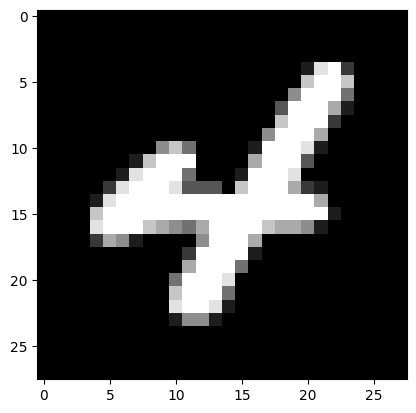

Prediction:  [2]
Label:  2


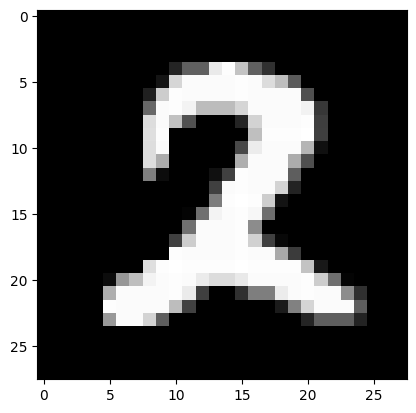

Prediction:  [9]
Label:  9


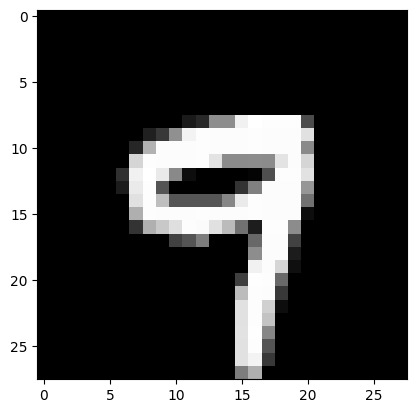

Prediction:  [4]
Label:  7


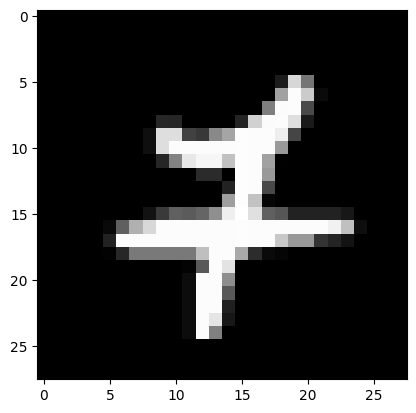

In [31]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [32]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 0 0 1 6 5 4 7 0 9 3 8 7 6 1 3 1 0 2 3 0 0 3 3 7 6 1 3 6 8 0 1 0 7 3 4 9
 3 1 8 8 8 6 0 3 3 1 8 8 5 3 1 4 3 0 5 8 3 6 2 7 8 3 6 1 2 0 3 4 7 5 0 3 3
 2 7 5 7 7 1 0 7 0 9 0 1 1 7 1 9 0 9 2 8 7 5 9 5 3 3 7 7 1 7 1 1 6 3 5 1 3
 4 2 1 8 0 4 2 1 4 4 6 4 1 5 7 2 7 1 0 6 3 2 3 6 1 1 0 5 0 9 4 9 4 4 2 7 4
 3 6 7 4 1 1 6 6 9 4 2 8 0 5 5 6 0 3 7 5 3 7 4 8 8 6 0 8 4 0 6 6 0 7 9 8 3
 6 3 4 3 9 9 9 2 7 1 3 3 8 3 2 4 4 3 8 5 1 1 8 4 3 9 5 4 9 0 5 5 6 6 1 2 6
 2 7 3 9 1 3 8 0 5 1 9 6 1 6 1 4 3 5 5 4 9 1 6 0 1 9 7 1 6 9 0 7 7 1 6 2 6
 4 7 3 6 4 9 7 7 8 1 7 5 7 7 5 3 7 6 5 8 3 5 1 7 7 9 4 0 0 1 5 5 1 2 4 9 2
 7 8 2 2 0 1 5 3 6 5 6 7 9 4 9 7 6 5 2 6 4 2 3 3 1 9 9 0 8 4 6 7 9 2 4 2 9
 4 8 5 0 8 8 1 2 3 8 9 4 6 8 5 3 1 5 1 1 6 9 7 8 9 8 2 0 0 2 6 6 1 5 9 8 1
 0 9 0 6 9 1 5 6 4 4 1 4 7 1 4 1 8 8 0 8 0 4 1 9 8 0 9 1 1 2 9 5 7 8 1 5 1
 0 4 9 8 8 8 8 8 6 7 3 1 3 8 6 5 3 6 9 6 3 0 2 5 0 8 2 0 9 9 6 0 2 1 0 5 3
 2 1 7 2 4 2 4 9 8 3 8 0 2 1 7 4 5 5 2 2 5 5 4 3 1 0 7 7 7 3 1 5 4 5 6 1 7
 2 4 6 1 1 2 6 8 4 0 3 8 

0.906